<font color='green' size=4><B>LAB1 Report</B></font>
- Tin             Harisombat    Student ID: 63340500017
- Ratjittra       Phanpoonsak   Student ID: 63340500054

<font color='green' size=3><B>System Architecture</B></font>
 System Architecture ของกลุ่ม 7 เป็นไปดังภาพที่ได้จาก rqt_graph

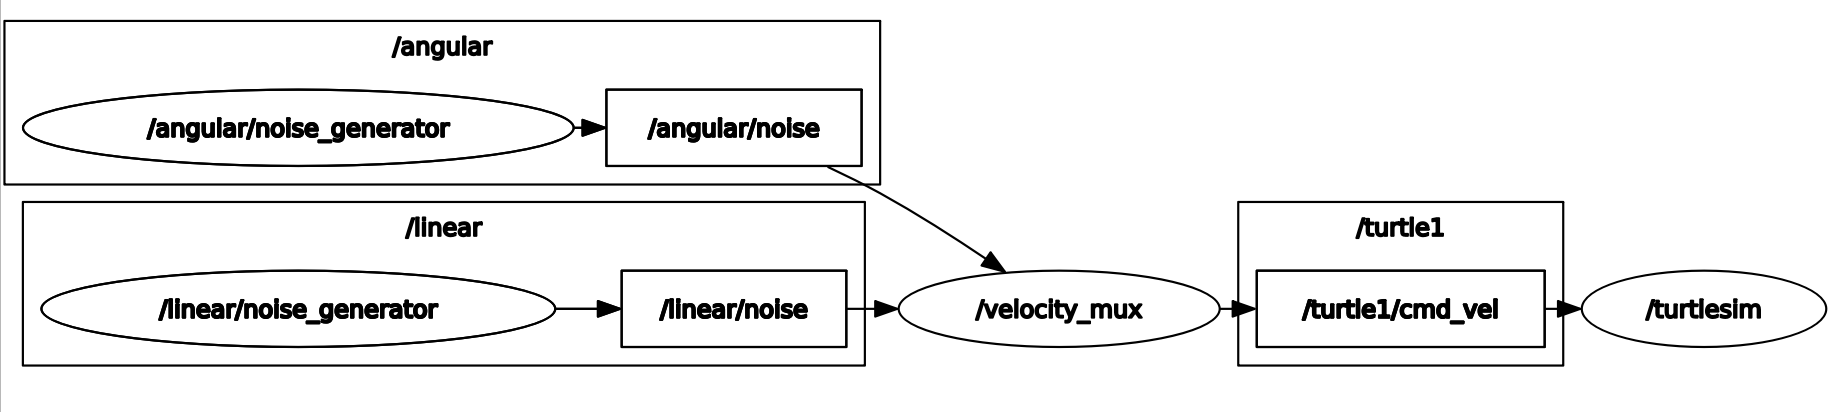

In [40]:
from IPython import display
display.Image("./fromRQT.png")

<font color='green' size=3><B>What did we do?</B></font>
 1) เพิ่มไฟล์ Service เข้าไปที่ CMakeLists ของ lab1_interfaces ลงไปดังภาพ

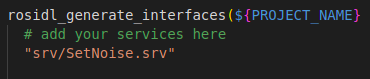

In [18]:
from IPython import display
display.Image("./step1.png")

 2) เพิ่มทั้ง 2 ไฟล์ใน Scripts และเพิ่ม launch เข้าไปที่ INSTALL ส่วน PROGRAMS และ DIRECTORY ตามลำดับ

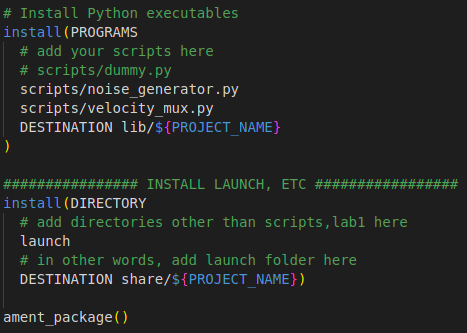

In [17]:
from IPython import display
display.Image("./step2.png")

3) สำหรับไฟล์ noise_generator.py เริ่มแก้ไขด้วยการ Add Libaries รวมถึงการ Import Service

In [13]:
#add more libraries
from std_msgs.msg import Float64
import numpy as np
import rclpy
from rclpy.node import Node
#import service
from lab1_interfaces.srv import SetNoise

4.สำหรับไฟล์ noise_generator.py เป็น NoiseGenerator Node ที่ต้องรับ Service ทั้ง /linear/set_noise และ /angular/set_noise และ publish /linear/noise และ /angular/noise ไปยัง VelocityMux Node และมี Timer ที่ดูแลในส่วนของการส่ง Message จึงต้องสร้าง Service, Publisher และ Timer ดังภาพ
- หมายเหตุ: ทางกลุ่มได้ใช้ประโยชน์จาก namespace ที่ทางอาจารย์เขียนไว้ให้ด้านล่าง จึงสามารถแยก /linear และ /angular ใน /noise บรรทัดเดียว 
- หมายเหตุ2: ทางกลุ่มใส่ชนิดตัวแปรและ depth of the queue that will hold incoming messages (default คือเลข 10) เพิ่มตาม syntax ที่ได้จาก resources
- หมายเหตุ3: ต้องใส่ self. เพิ่มเพื่อบอกว่ามันอยู่ใน class NoiseGenerator
- หมายเหตุ4: declare parameter เพื่อประกาศ namespace โดยให้ค่าเริ่มต้นเป็น String เปล่า

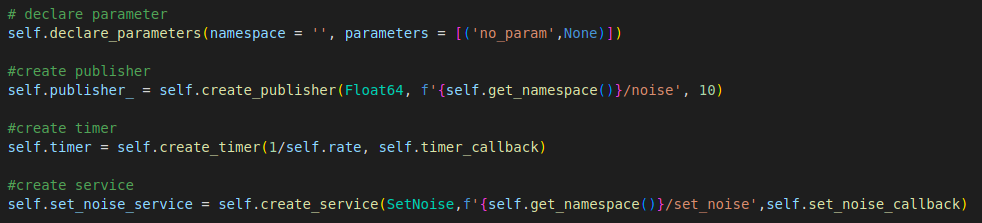

In [42]:
from IPython import display
display.Image("./step3.png")

5.สำหรับ set_noise_callback function ในไฟล์ noise_generator.py ซึ่งเป็น function ของ Request และ Response 
- ทางกลุ่มจึงเพิ่ม self.mean = request.mean.data และ self.variance.data เพื่อขอ Request data จาก Service แล้ว return Response กลับมา
- หมายเหตุ: ใส่ .data ตามหลังเพิ่ม เพื่อ request access data ภายใน mean

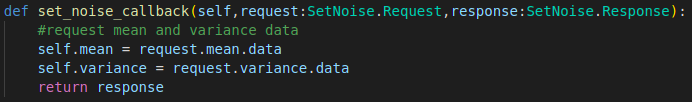

In [15]:
from IPython import display
display.Image("./step4.png")

6.สำหรับ timer_callback function ในไฟล์ noise_generator.py ซึ่งเป็น function ที่มีส่วนที่จัดการเกี่ยวกับการส่ง Message โดยที่
- Message เป็นตัวแปรประเภท Float64
- Message Data คือ mean และ standard deviation จาก Normal Distribution ซึ่ง Standard Deviation สามารถหาได้จากรากที่ 2 ของ variance
- จากนั้นให้ Publisher ทำการ publish message ของเราออกไป

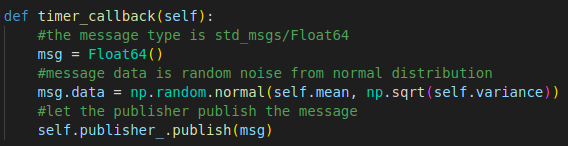

In [20]:
from IPython import display
display.Image("./step5.png")

7.สำหรับ main function ในไฟล์ noise_generator.py ทางกลุ่มได้สร้าง Object ชื่อ noise เพื่อเรียกใช้ Class NoiseGenerator และเพิ่มโค้ดอีก 3 บรรทัดเพื่อหยุดรัน Node เช่น การกดปิดหรือ Ctrl+C 

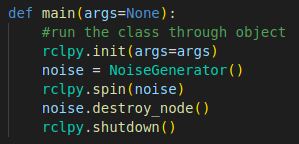

In [22]:
from IPython import display
display.Image("./step6.png")

8.สำหรับไฟล์ velocity_mux.py เริ่มแก้ไขด้วยการ Add Libaries

In [23]:
#add more libraries
import rclpy
from rclpy.node import Node
from geometry_msgs.msg import Twist

9.สำหรับไฟล์ velocity_mux.py เป็น Node VelocityMux ที่ Subscribe /linear/noise และ /angular/noise และ publish /turtle1/cmd_vel ไปยัง Node VelocityMux และมี Timer ที่ดูแลในส่วนของการส่ง Message จึงต้องสร้าง Subscriber, Publisher และ Timer ดังภาพ 
- หมายเหตุ:  ข้อมูลที่ Subsribe เป็นข้อมูลประเภท Float64
- หมายเหตุ2: ข้อมูลที่ Publish เป็นข้อมูลประเภท Twist
- หมายเหตุ3: depth of the queue that will hold incoming messages (default คือเลข 10)

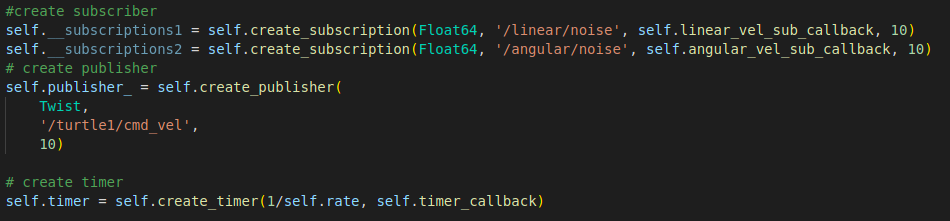

In [25]:
from IPython import display
display.Image("./step7.png")

10.สำหรับ linear_vel_sub_callback function และ angular_vel_sub_callback function ในไฟล์ velocity_mux.py เป็นฟังก์ชันที่รับ Data มาจาก Node NoiseGenerator โดยทางกลุ่มกำหนดให้
- linearvel รับ Message Data เชิงเส้น
- angularvel รับ Message Data เชิงมุม

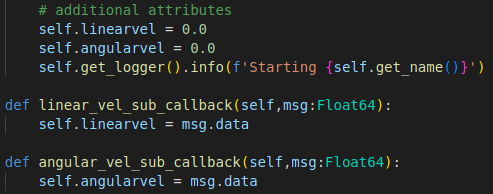

In [27]:
from IPython import display
display.Image("./step8.png")

11.สำหรับ timer_callback function ใน velocity_mux.py ซึ่งเป็น function ที่มีส่วนที่จัดการเกี่ยวกับการส่ง Message โดยที่
- Message เป็นตัวแปรประเภท Twist
- Message Data เชิงเส้นคือ linearvel
- Message Data เชิงมุมคือ angularvel
- จากนั้นให้ Publisher รวม Message Data แล้วทำการ publish message ของเราออกไป

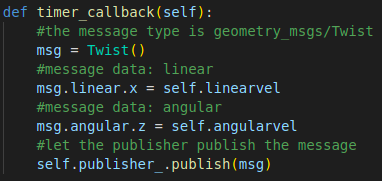

In [28]:
from IPython import display
display.Image("./step9.png")

12.สำหรับ main function ในไฟล์ velocity_mux.py ทางกลุ่มได้สร้าง Object ชื่อ velocity_muxed เพื่อเรียกใช้ Class VelocityMux และเพิ่มโค้ดอีก 3 บรรทัดเพื่อหยุดรัน Node เช่น การกดปิดหรือ Ctrl+C 

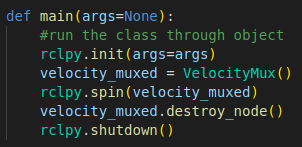

In [29]:
from IPython import display
display.Image("./step10.png")

13.สำหรับไฟล์ random_walk.launch.py ทางกลุ่มได้เปลี่ยนจากตัวแปร 'v_max' เป็น 'rate' เพื่อตั้งค่าความถี่ในการส่งสัญญาณ และกำหนดให้มีค่า 5.0 Hz ซึ่งเป็น Default Rate 

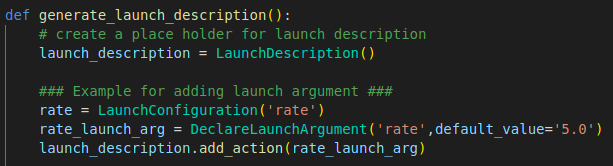

In [30]:
from IPython import display
display.Image("./step11.png")

14.Launch Turtlesim Node ในไฟล์ random_walk.launch.py โดย Node นี้มี Package ชื่อ 'turtlesim' และ Executable ชื่อ 'turtlesim_node' แล้วเพิ่มเป็นอีก Action
- หมายเหตุ: ทางทีมได้ Launch Node นี้เป็น Node แรกเพราะต้องการเปิดเจ้าเต่าขึ้นมาก่อน

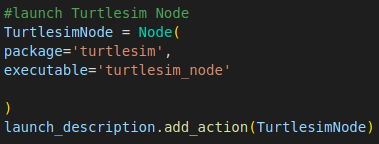

In [32]:
from IPython import display
display.Image("./step12.png")

15.Launch LinearNoiseGenerator Node ในไฟล์ random_walk.launch.py โดย Node นี้มี Package ชื่อ 'fra333_lab1_7', Executable ชื่อ 'noise_generator.py', namespace คือ 'linear' และมี arguments คือ rate แล้วเพิ่มเป็นอีก Action
- หมายเหตุ: Launch Node แยกกันเพราะใช้คนละ namespace

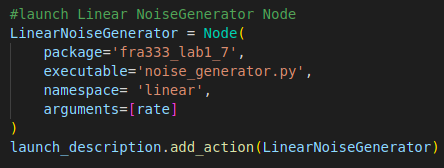

In [33]:
from IPython import display
display.Image("./step13.png")

16.Launch AngularNoiseGenerator Node ในไฟล์ random_walk.launch.py โดย Node นี้มี Package ชื่อ 'fra333_lab1_7', Executable ชื่อ 'noise_generator.py', namespace คือ 'angular' และมี arguments คือ rate แล้วเพิ่มเป็นอีก Action 

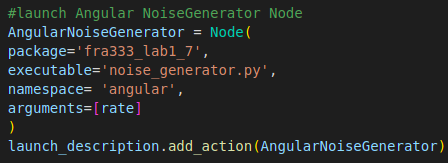

In [34]:
from IPython import display
display.Image("./step14.png")

17.Launch VelocityMuxx Node ในไฟล์ random_walk.launch.py โดย Node นี้มี Package ชื่อ 'fra333_lab1_7', Executable ชื่อ 'velocity_mux.py', และมี arguments คือ rate แล้วเพิ่มเป็นอีก Action 

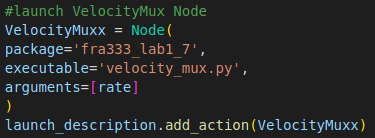

In [35]:
from IPython import display
display.Image("./step15.png")

18.เพิ่ม mean และ variance เข้าไปที่ไฟล์ SerNoise.srv ซึ่งทั้ง 2 ตัวแปรเป็นตัวแปรประเภท Float64

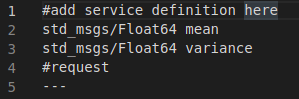

In [37]:
from IPython import display
display.Image("./step16.png")

19.เจ้าเต่าก็จะเดินแบบ 'r a n d o m'

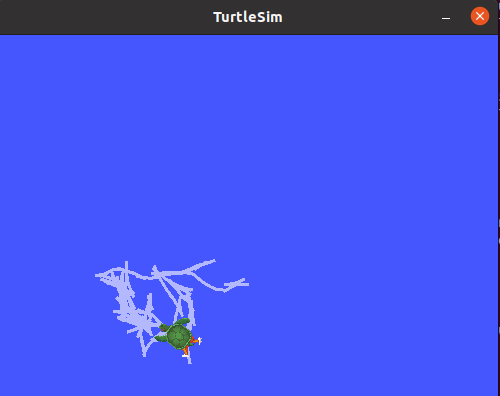

In [39]:
from IPython import display
display.Image("./step17.png")